In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages (2.2.3)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importamos las librerias necesarias para la realización de nuestro EDA:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [7]:
# Cargamos nuestro Dataset y revisamos las primeras filas para conocer su estructura:
df_sleep = pd.read_csv("Sleep_Efficiency.csv")

df_sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [8]:
## Haremos unaxploración General del Dataset
# Conocemos el tamaño de los datos:
df_sleep.shape

(452, 15)

In [9]:
# Obtenemos una visión general de las columnas y sus tipos de datos para identificar las variables categóricas y numéricas.
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [61]:
# Renombramos las variables para ser mas eficientes:
df_sleep.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration ',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

df_sleep.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [11]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup_time             452 non-null    object 
 5   Sleep_duration          452 non-null    float64
 6   Sleep_efficiency        452 non-null    float64
 7   REM_sleep_percentage    452 non-null    int64  
 8   Deep_sleep_percentage   452 non-null    int64  
 9   Light_sleep_percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine_consumption    427 non-null    float64
 12  Alcohol_consumption     438 non-null    float64
 13  Smoking_status          452 non-null    object 
 14  Exercise_frequency      446 non-null    fl

In [13]:
df_sleep.describe()

,ID,Age,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Exercise_frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [14]:
print("Datos perdidos en cada columna:")
df_sleep.isnull().sum()

Datos perdidos en cada columna:


ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup_time                0
Sleep_duration             0
Sleep_efficiency           0
REM_sleep_percentage       0
Deep_sleep_percentage      0
Light_sleep_percentage     0
Awakenings                20
Caffeine_consumption      25
Alcohol_consumption       14
Smoking_status             0
Exercise_frequency         6
dtype: int64

In [15]:
# Eliminamos posibles filas duplicadas.
df_sleep = df_sleep.drop_duplicates()

In [16]:
df_sleep.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup_time', 'Sleep_duration ',
       'Sleep_efficiency', 'REM_sleep_percentage', 'Deep_sleep_percentage',
       'Light_sleep_percentage', 'Awakenings', 'Caffeine_consumption',
       'Alcohol_consumption', 'Smoking_status', 'Exercise_frequency'],
      dtype='object')

In [ ]:
sns.kdeplot(df_sleep['Sleep_efficiency'], fill=True, color="salmon")
plt.title("Distribución de la Eficiencia del Sueño")
plt.xlabel("Eficiencia (%)")

In [ ]:
sns.kdeplot(data=df_sleep, x="REM_sleep_percentage",color="blue",fill=True)
plt.xlabel("Sleep Duration", color="black", fontsize=10)
plt.ylabel("frequency", color="black", fontsize=10)
plt.title("Duración del sueño", color="black",fontsize=15)

In [62]:
df_sleep.Age.value_counts()

Age
27    19
52    19
37    18
40    17
29    17
      ..
10     1
13     1
67     1
17     1
12     1
Name: count, Length: 61, dtype: int64

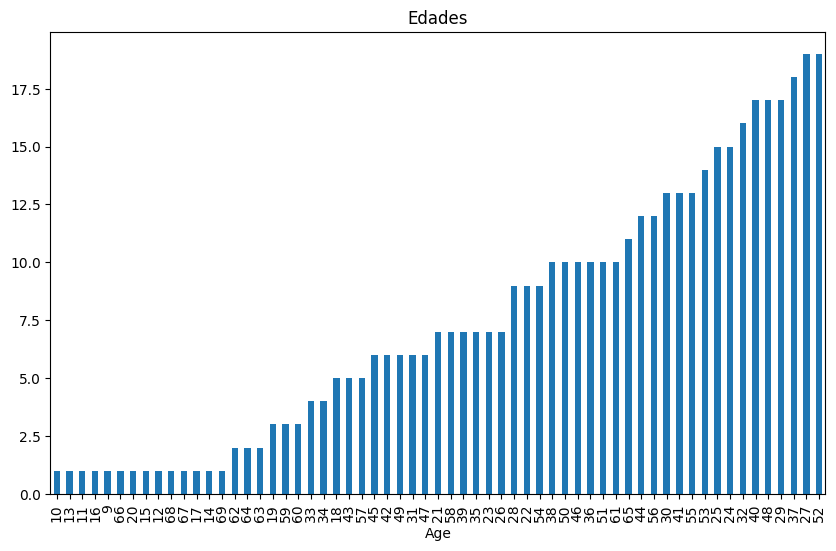

In [42]:
df_sleep.Age.value_counts().sort_values(ascending=True).plot(
    kind="bar",
    title="Edades",
    figsize=(10,6)
);

Text(0.5, 1.0, 'Distribución de la edad')

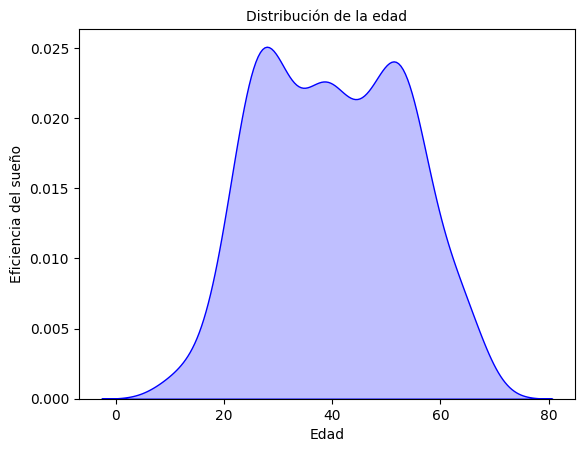

In [66]:
sns.kdeplot(data=df_sleep, x="Age",color="blue",fill=True)
plt.xlabel("Edad", color="black", fontsize=10)
plt.ylabel("Eficiencia del sueño", color="black", fontsize=10)
plt.title("Distribución de la edad", color="black",fontsize=10)

Text(0, 0.5, 'Eficiencia del Sueño')

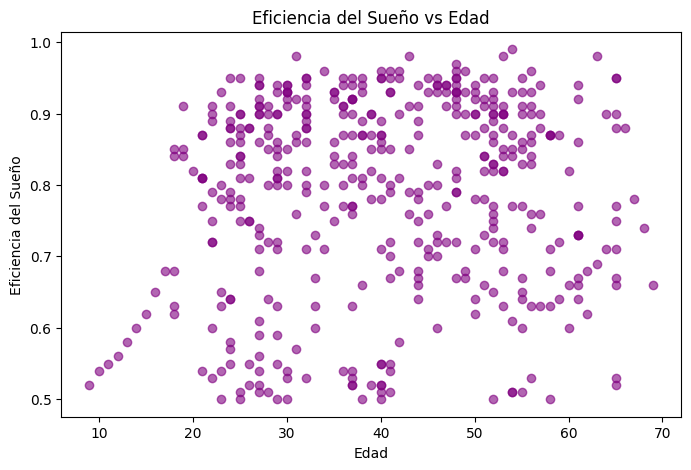

In [63]:
plt.figure(figsize=(8, 5))
plt.scatter(df_sleep['Age'], df_sleep['Sleep_efficiency'], alpha=0.6, color='purple')
plt.title('Eficiencia del Sueño vs Edad')
plt.xlabel('Edad')
plt.ylabel('Eficiencia del Sueño')

In [21]:
df_sleep.Gender.value_counts()

Gender
Male      228
Female    224
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribución de Género')

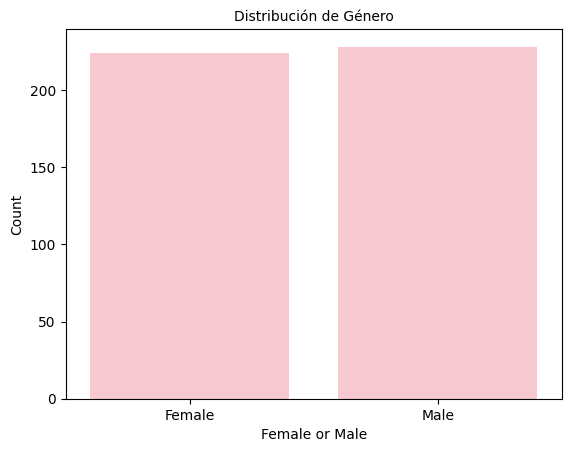

In [68]:
sns.countplot(data=df_sleep,x="Gender", color="pink")
plt.xlabel("Female or Male", color="black",fontsize=10)
plt.ylabel("Count", color="black",fontsize=10)
plt.title("Distribución de Género", color="black",fontsize=10)

In [23]:
df_sleep.Exercise_frequency.value_counts()

Exercise_frequency
3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: count, dtype: int64

Text(0.5, 1.0, 'Frecuencia de Ejercicio')

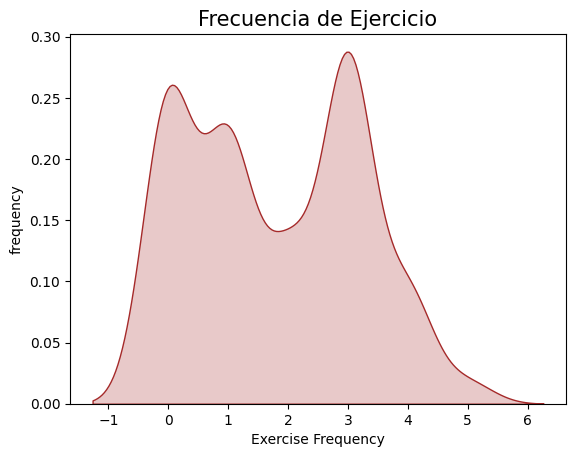

In [69]:
sns.kdeplot(data=df_sleep, x="Exercise_frequency",color="brown",fill=True)
plt.xlabel("Exercise Frequency", color="black", fontsize=10)
plt.ylabel("frequency", color="black", fontsize=10)
plt.title("Frecuencia de Ejercicio", color="black",fontsize=15)

Text(0.5, 0, 'Frecuencia de Ejercicio')

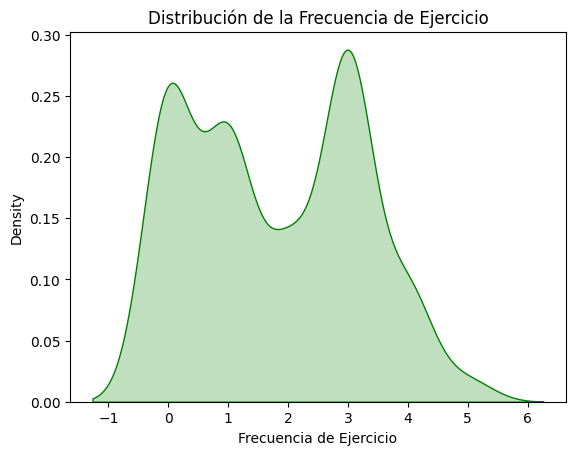

In [25]:
sns.kdeplot(df_sleep['Exercise_frequency'], fill=True, color="green")
plt.title("Distribución de la Frecuencia de Ejercicio")
plt.xlabel("Frecuencia de Ejercicio")

Text(0.5, 0, 'Consumo de Cafeína')

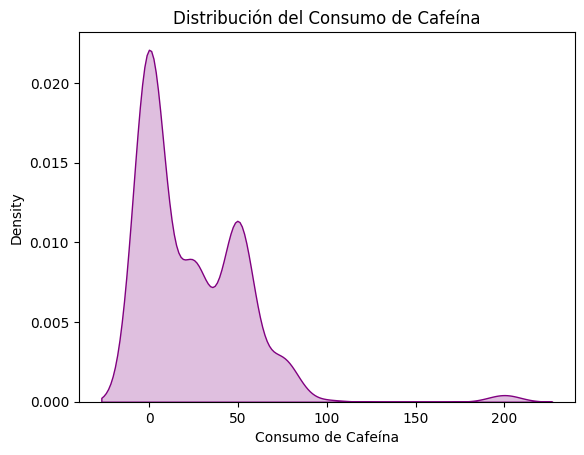

In [26]:
sns.kdeplot(df_sleep['Caffeine_consumption'], fill=True, color="purple")
plt.title("Distribución del Consumo de Cafeína")
plt.xlabel("Consumo de Cafeína")

In [28]:
df_sleep.Smoking_status.value_counts()

Smoking_status
No     298
Yes    154
Name: count, dtype: int64

Text(0, 0.5, 'Eficiencia del Sueño')

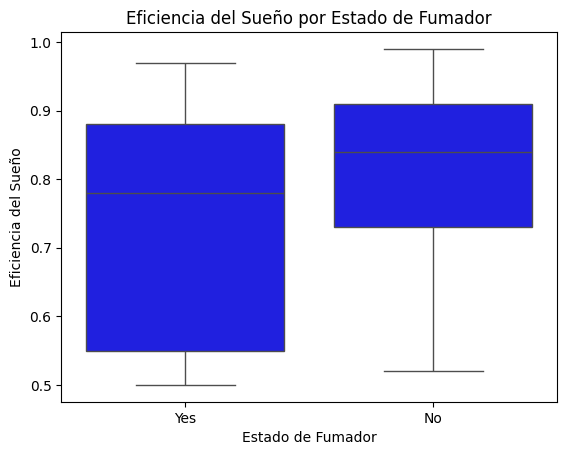

In [29]:
sns.boxplot(data=df_sleep, x='Smoking_status', y='Sleep_efficiency', color="blue")
plt.title("Eficiencia del Sueño por Estado de Fumador")
plt.xlabel("Estado de Fumador")
plt.ylabel("Eficiencia del Sueño")

Text(0.5, 1.0, 'Número de fumadores y no fumadores')

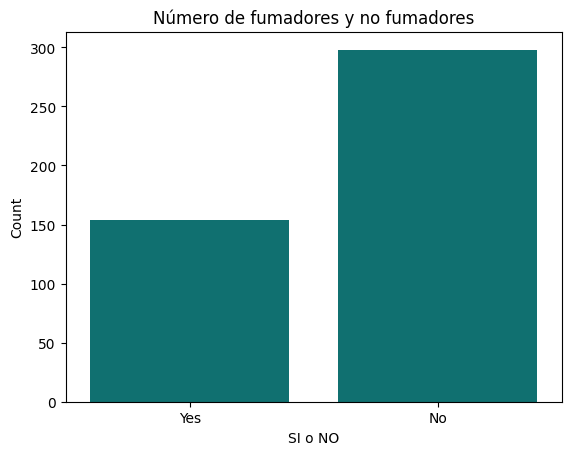

In [30]:
sns.countplot(data=df_sleep,x="Smoking_status", color="teal")
plt.xlabel("SI o NO", color="black",fontsize=10)
plt.ylabel("Count", color="black",fontsize=10)
plt.title("Número de fumadores y no fumadores", color="black",fontsize=12)

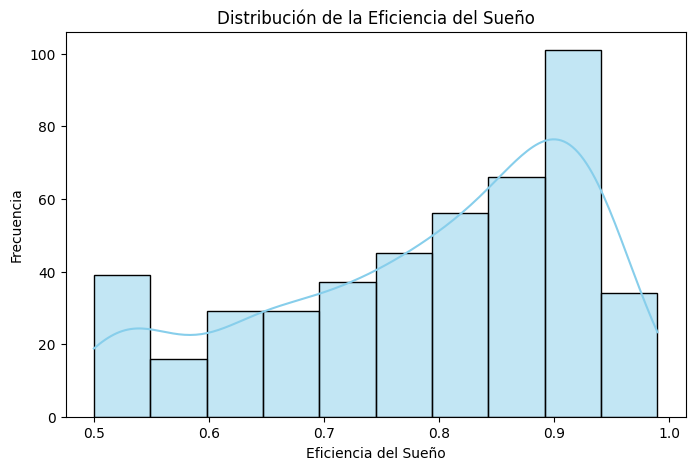

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df_sleep['Sleep_efficiency'], kde=True, color='skyblue')
plt.title('Distribución de la Eficiencia del Sueño')
plt.xlabel('Eficiencia del Sueño')
plt.ylabel('Frecuencia')
plt.show()


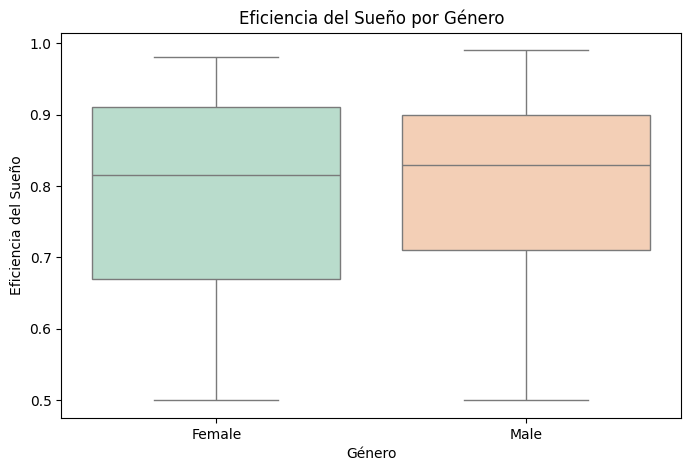

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Sleep_efficiency', data=df_sleep, hue='Gender', palette="Pastel2", dodge=False)
plt.title('Eficiencia del Sueño por Género')
plt.xlabel('Género')
plt.ylabel('Eficiencia del Sueño')
plt.legend([],[], frameon=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2652\3932832823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exercise_frequency', y='Sleep_efficiency', data=df_sleep, palette="coolwarm")


Text(0, 0.5, 'Eficiencia del Sueño')

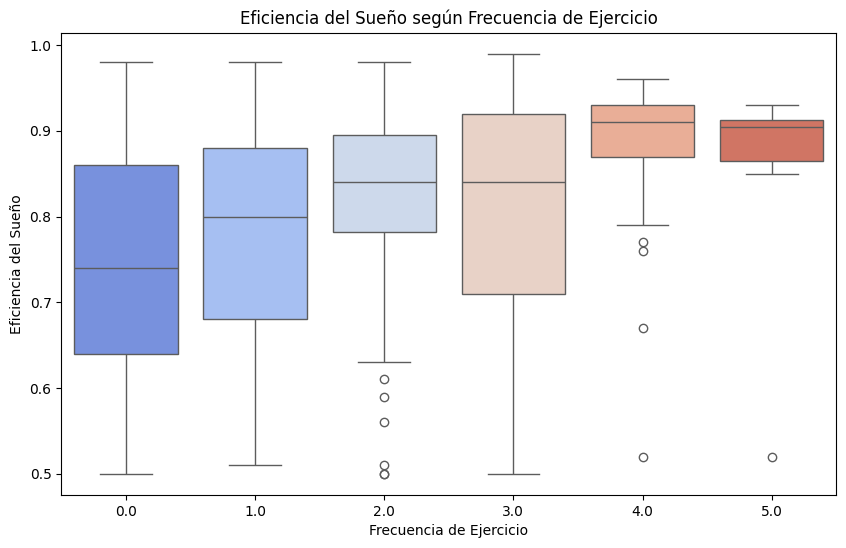

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise_frequency', y='Sleep_efficiency', data=df_sleep, palette="coolwarm")
plt.title('Eficiencia del sueño según frecuencia de ejercicio')
plt.xlabel('Frecuencia de Ejercicio')
plt.ylabel('Eficiencia del Sueño')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2652\237852034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alcohol_consumption', y='Sleep_efficiency', data=df_sleep, palette="muted")


Text(0, 0.5, 'Eficiencia del Sueño')

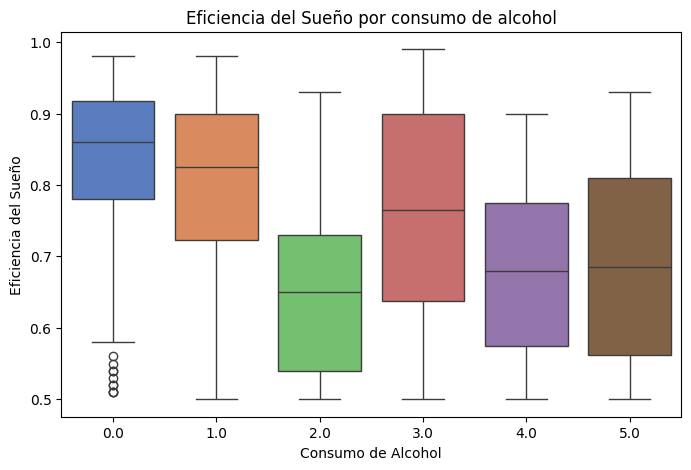

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Alcohol_consumption', y='Sleep_efficiency', data=df_sleep, palette="muted")
plt.title('Eficiencia del Sueño por consumo de alcohol')
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Eficiencia del Sueño')

Text(0, 0.5, 'Eficiencia del Sueño')

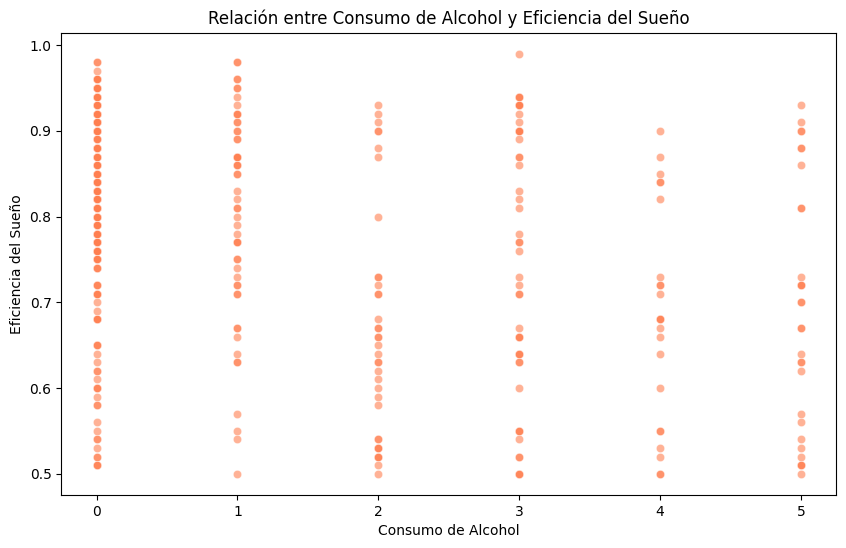

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Alcohol_consumption', y='Sleep_efficiency', data=df_sleep, color='coral', alpha=0.6)
plt.title('Relación entre Consumo de Alcohol y Eficiencia del Sueño')
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Eficiencia del Sueño')

 - Se observó que la eficiencia del sueño de las mujeres aumenta a los 50 años de edad y la eficiencia del sueño de los hombres aumuenta a los 60 años de edad.
 - Según el diagrama de caja, el hábito de fumar esta relacionado con una inestabilidad en la efiiencia del sueño.
 - Las mujeres tienden a tener una eficiencia del sueño más consistente, mientras que los hombres tiene una mayor variabilidad en su eficiencia del sueño.
 - Las personas que hacen ejercicio entre 4 y 5 veces muestran una relación positiva con la eficiencia del sueño, mientras que aquellas personas que hacen ejercicio entre 0 y 3 veces tienen una menor eficiencia del sueño.
 - Podemos inferir que a medida que aumenta una persona el consumo de alcohol, disminuya la eficiencia del sueño. Aquellos que no consumen alcohol tienen una eficiencia del sueño más alta.
 